# <b>The Central Limit Theorem<b>

### <b>Introduction<b>
The Central Limit Theorem is one of the most fundemental theorems of probability. Loosely, it states that the fluctuations of the sample mean are in the order of $\frac{1}{\sqrt{n}}$, and are approximately normally distributed.  
Formally, the Central Limit Theorem states that:  
Suppose $X_i$ are independently and identically distributed random variables with mean $\mu$ and finite variance $\sigma^2$. Let $\bar{X} = \frac{1}{n}\sum_{i=1}^{n}{X_i}$. Then $\frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \overset{d}{\to} Z$, where $Z \sim N(0, 1)$

#### <b>Proof<b>
The simplest proof of the central limit theorem requires the introduction of characteristic functions, and the use of their properties:
##### <b>Characteristic Functions<b>
The characteristic function of a distribution $X$ is defined as:  
$
\phi_X : \mathbb{R} \to \mathbb{C} \\
\phi_X(t)=\mathbb{E}[e^{itX}]=\mathbb{E}[\cos(tX)+i\sin(tX)]
$

Note that since cos and sin are bounded this is defined for any distribution $X$ and real $t$.
Characteristic functions are particularly useful when dealing with transformations of distributions:  
  
Let $X$, $Y$ be independent distributions. Then:  
$
\begin{array}{l}
\phi_{X+Y}(t)=\mathbb{E}[e^{it(X+Y)}]=\mathbb{E}[e^{itX}e^{itY}]=\mathbb{E}[e^{itX}]\mathbb{E}[e^{itY}]=\phi_{X}(t)\phi_{Y}(t)\\
\phi_{kX}(t)=\mathbb{E}[e^{itkX}]=\phi_{X}(kt)\\
\phi^{'}_{X}(0)=\mathbb{E}[iXe^{itX}]\big|_{ t=0}=i\mathbb{E}[X]\\
\phi^{''}_{X}(0)=\mathbb{E}[-X^2e^{itX}]\big|_{ t=0}=-\mathbb{E}[X^2]
\end{array}
$
##### <b>Levy's Continuity Theorem<b>
Suppose there is a sequence of random variables $(X_i)_{n=1}^{\infty}$ and the sequence of corresponding characteristic functions $(\phi_{X_i})_{n=1}^{\infty}$. Now suppose that $\phi_{X_i}(t) \to \phi_X(t)\  (\forall t\in \mathbb{R})$. Then $X_i \overset{d}{\to} X$.
##### <b>Proof of Central Limit Theorem<b>
Let $X_i$ be independently and identically distributed with mean $\mu$ and finite variance $\sigma^2$. Then let $Y_i = \frac{X_i - \mu}{\sigma}$. $Y_i$ has mean 0 and variance 1. Now consider $Z_n = \frac{1}{\sqrt{n}}\sum_{i=1}^{n}Y_i$:  
$\phi_{Z_n}(t)=\prod_{i=1}^{n}\phi_{Y_i}\big(\frac{t}{\sqrt{n}}\big)=\phi_{Y}\big(\frac{t}{\sqrt{n}}\big)^n$  
By Taylor's Theorem:  
$\phi_{Y}\big(\frac{t}{\sqrt{n}}\big) = 1 - \frac{t^2}{2n} + \xi\big(\frac{t^2}{n}\big)$, where $\xi\big(\frac{t^2}{n}\big)\frac{n}{t^2} \to 0$ as $n \to \infty$.  
Therefore:  
$\phi_{Z_n}(t)=\big(1 - \frac{t^2}{2n} + \xi\big(\frac{t^2}{n}\big)\big)^n \to e^{-\frac{t^2}{2n}} = \phi_Z(t)$  
Thus by Levy's Continuity Theorem, $Z_n \overset{d}{\to} Z$

### <b>Demonstration<b>

To demonstrate the convergence of the Central Limit Theorem, I will show a monte-carlo approximation of the probability density of the sample means with a variety of distributions.

Note that if $U$ is the uniform distribution on $[0, 1]$, and $F_X$ is the c.d.f. of X, then:

$\mathbb{P}(F_X^{-1}(U) \leq x)=\mathbb{P}(U \leq F_X(x))=F_X(x) = \mathbb{P}(X \leq x)$.

Thus $F_X^{-1}(U)$ has the same distribution as $X$.

#### Example 1: Triangular Distribution

$
f_X(x) =
\left\{
	\begin{array}{ll}
		2x  & \mbox{if } x \in [0,1] \\
		0 & \mbox{if }x \notin [0,1]
	\end{array}
\right.\\
F_X(x) =
\left\{
	\begin{array}{ll}
		0 & \mbox{if }x \lt 0 \\
		x^2  & \mbox{if } x \in [0,1] \\
		1 & \mbox{if }x \gt 1
	\end{array}
\right.\\
F_X^{-1}(x)=\sqrt{x}
$

In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from sklearn.neighbors.kde import KernelDensity

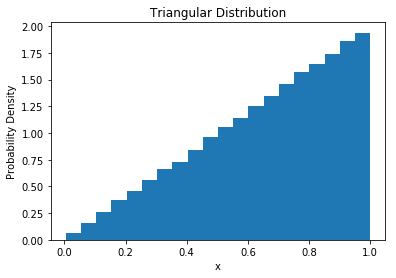

In [46]:
# generates data from triangular distribution
x1 = np.sqrt(np.random.uniform(0,1,100000))

# plots histogram
plt.hist(x1, bins=20, density=True)
plt.title("Triangular Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.show()

In [30]:
def plotsMeanedTriangleData(n: int):
    # generates data from triangular distribution
    x = np.sqrt(np.random.uniform(0,1,n*100000))
    
    # takes sample means
    x = [x[i*n:(i+1)*n].mean() for i in range(100000)]

    # normalises data with sample statistics
    x = x - np.mean(x)
    x = x/np.std(x)

    # plots histogram
    plt.hist(x, bins=25, density=True)
    plt.title("Triangular Distribution, sample meaned and normalised (n={})".format(n))
    plt.xlabel("x")
    plt.ylabel("Probability Density")

    # plots standard normal distribution for reference
    xvals = np.linspace(-6, 6, 100)
    plt.plot(xvals,mlab.normpdf(xvals, 0, 1))
    plt.legend(["N(0, 1)", "Normalised Means"])
    plt.show()

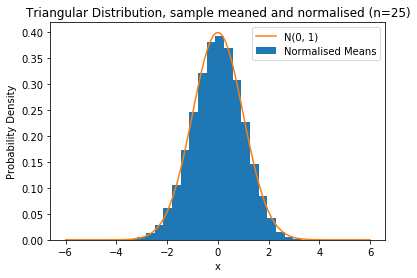

In [47]:
plotsMeanedTriangleData(25)

#### Example 2: Exponential Distribution
$
f_X(x) =
\left\{
	\begin{array}{ll}
		e^{-x}  & \mbox{if } x \geq 0 \\
		0 & \mbox{if }x \lt 0
	\end{array}
\right.\\
F_X(x) =
\left\{
	\begin{array}{ll}
		0 & \mbox{if }x \lt 0 \\
		1 - e^{-x} & \mbox{if }x \geq 0
	\end{array}
\right.\\
F_X^{-1}(x)=-\ln{(1-x)}
$

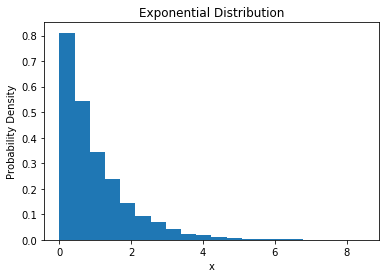

In [32]:
# generates data from exponential distribution
x2 = -np.log(1 - np.random.uniform(0,1,10000))

# plots histogram
plt.hist(x2, bins=20, density=True)
plt.title("Exponential Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.show()

In [33]:
def plotsMeanedExpData(n: int):
    # generates data from exponential distribution
    x = -np.log(1 - np.random.uniform(0,1,n*100000))
    
    # takes sample means
    x = [x[i*n:(i+1)*n].mean() for i in range(100000)]

    # normalises data with sample statistics
    x = x - np.mean(x)
    x = x/np.std(x)

    # plots histogram
    plt.hist(x, bins=25, density=True)
    plt.title("Exponential Distribution, sample meaned and normalised (n={})".format(n))
    plt.xlabel("x")
    plt.ylabel("Probability Density")

    # plots standard normal distribution for reference
    xvals = np.linspace(-6, 6, 100)
    plt.plot(xvals,mlab.normpdf(xvals, 0, 1))
    plt.legend(["N(0, 1)", "Normalised Means"])
    plt.show()

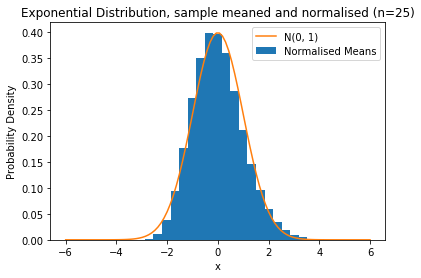

In [48]:
plotsMeanedExpData(25)

#### Example 3: 'Bitriangular' Distribution

$
f_X(x) =
\left\{
	\begin{array}{ll}
		\left|x\right|  & \mbox{if } x \in [-1,1] \\
		0 & \mbox{if }x \notin [-1,1]
	\end{array}
\right.\\
F_X(x) =
\left\{
	\begin{array}{ll}
		0 & \mbox{if }x \lt 1 \\
		\frac{1-x^2}{2}  & \mbox{if } x \in [-1,0) \\
		\frac{1+x^2}{2}  & \mbox{if } x \in [0,1] \\
		1 & \mbox{if }x \gt 1
	\end{array}
\right.\\
F_X^{-1}(x)=sgn(2x-1)\sqrt{\left|2x-1\right|}
$

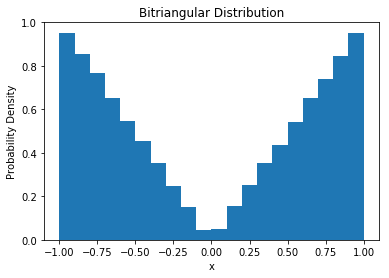

In [42]:
# generates data from bitriangular distribution
x3 = np.random.uniform(0,1,100000)
x3 = 2 * x3 - 1
x3 = np.sign(x3) * np.sqrt(np.abs(x3))

# plots histogram
plt.hist(x3, bins=20, density=True)
plt.title("Bitriangular Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.show()

In [43]:
def plotsMeanedBitriangleData(n: int):
    # generates data
    x = np.random.uniform(0,1,n*100000)
    x = 2 * x - 1
    x = np.sign(x) * np.sqrt(np.abs(x))
    
    # takes sample means
    x = [x[i*n:(i+1)*n].mean() for i in range(100000)]

    # normalises data with sample statistics
    x = x - np.mean(x)
    x = x/np.std(x)

    # plots histogram
    plt.hist(x, bins=25, density=True)
    plt.title("Bitriangular Distribution, sample meaned and normalised (n={})".format(n))
    plt.xlabel("x")
    plt.ylabel("Probability Density")

    # plots standard normal distribution for reference
    xvals = np.linspace(-6, 6, 100)
    plt.plot(xvals,mlab.normpdf(xvals, 0, 1))
    plt.legend(["N(0, 1)", "Normalised Means"])
    plt.show()

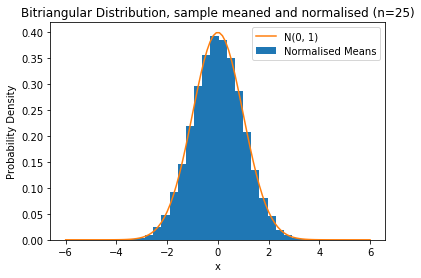

In [49]:
plotsMeanedBitriangleData(25)

### <b>Conclusion<b>

While I have selected a limited set of distributions, it is evident that in a selection of cases, the sample means of distributions are approximately normally distributed.  
This has been demonstrated to be the case in examples of:
- Skewed distributions (Triangular)
- Distributions with semi-infinite support (Exponential)  
- Bimodal distributions (Bitriangular)

This general result about distributions is particularly useful, since a lot is already known about the normal distribution, and it allows for the employment of statistical methods such as the Z-test in most situations under a fairly loose set of assumptions.  
A similar statement is true for multidimensional distributions and the multivariate normal distribution.